In [1]:
from sklearn import cross_validation, grid_search, metrics, ensemble
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


C:\Users\Lappy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lappy\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#reading training data
df = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/train.csv')
df = df.sample(frac=0.4)

In [3]:
#using songs and members dataset
songs = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [4]:
#removing null values
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.247004
source_screen_name         5.620802
source_type                0.290244
target                     0.000000
song_length                0.001660
genre_ids                  1.609608
artist_name                0.001660
composer                  22.682870
lyricist                  43.052972
language                   0.002169
city                       0.000000
bd                         0.000000
gender                    40.177677
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [5]:
#removing NA values from df

for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [6]:
# creating a column of registration_init_date  using month, year and day

df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


# creating expiration date using year, date, month

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day



In [7]:
# conversion into categorical values

df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [8]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
    
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
df = df.drop(['expiration_date', 'lyricist'], 1)

In [9]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])


In [10]:
#creating decision tree classifier
model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
model.fit(df[df.columns[df.columns != 'target']], df.target)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

In [12]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [13]:
len(df)

2950967

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
y = df['target'].values
model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])


In [15]:
model.score(df[df.columns[df.columns != 'target']], df.target)
#deciding parameters on the basis of scores

0.86886773047614563

In [16]:
df_test=pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/test.csv')
songs = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

members = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100


for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day


df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    

for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes
    

In [17]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

In [18]:
df.columns

Index(['msno', 'song_id', 'source_type', 'target', 'song_length',
       'artist_name', 'composer', 'registration_init_time',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

In [19]:
df_test.columns


Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [20]:
del df_test['source_screen_name']
del df_test['genre_ids']

del df_test['language']
del df_test['city']
del df_test['bd']
del df_test['gender']
del df_test['registered_via']
del df_test['source_system_tab']
del df_test['registration_init_time_year']
del df_test['registration_init_time_month']
del df_test['expiration_date_year']
del df_test['expiration_date_month']



In [21]:
df_test.columns

Index(['id', 'msno', 'song_id', 'source_type', 'song_length', 'artist_name',
       'composer', 'registration_init_time', 'registration_init_time_day',
       'expiration_date_day'],
      dtype='object')

In [22]:
len(df_test.columns)

10

In [23]:
len(df.columns)

10

In [24]:
len(df_test)

2556790

In [25]:
predictions = np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [33]:
predictions = predictions/3

submission = pd.read_csv('file:///E:/Namrata/study/cs/1stsem/MachineLearning/Project/datasets/sample_submission.csv')
#submission = submission.sample(frac=0.6)
submission.target=predictions
submission.to_csv('decision.csv',index=False)

In [37]:
#hold out validation to plot roc curve

length=df['target'].count()
split = 0.40

test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

In [38]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(test['target'], predictions_roc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)

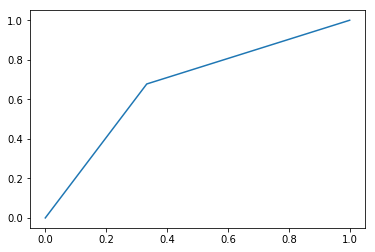

In [39]:
plt.show()

In [40]:
roc_auc

0.67213030387770634

In [41]:
X_array=df['target'].values

In [46]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(X_array,predictions_roc, target_names=target_names))


             precision    recall  f1-score   support

    class 0       0.50      0.49      0.49    585818
    class 1       0.50      0.51      0.51    594569

avg / total       0.50      0.50      0.50   1180387

